In [1]:
import pandas as pd
from utils.metrics import generate_recommendation_metrics, generate_rpa_metrics, generate_constraints_metrics, generate_qa_metrics

c:\Users\kiran.busch\anaconda3\envs\openLLMinBPM-benchmark\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_mixtral = pd.read_excel('result_mixtral-8x7b-instruct.xlsx')
df_llama3 = pd.read_excel('result_lama3-7b.xlsx')
df_claude2 = pd.read_excel('result_claude2-13b.xlsx')
df_falcon2 = pd.read_excel('result_falcon2-11b.xlsx')
df_phi3 = pd.read_excel('result_Phi-3-14b.xlsx')
df_yi = pd.read_excel('result_yi-15-9b.xlsx')
df_gpt = pd.read_excel('result_gpt-4.xlsx')

In [3]:
frames = [df_mixtral, df_llama3, df_claude2, df_falcon2, df_phi3, df_yi,df_gpt]
df = pd.concat(frames).reset_index(drop='index')
df['content']= df['content'].apply(lambda x:x.strip())

In [4]:
column_names_to_replace = {'prompt_pattern': 'prompt pattern', 'model_name':'llm', 'inferance_time':'inferance time', 'completion_tokens':'completion tokens', 'average_similarity':'avg cosine similarity', 'overall_precision':'precision', 'overall_recall':'recall', 'overall_f1':'F1',
                            'avg_bleu':'BLEU',
                            'avg_rouge1':'ROUG1',
                            'avg_rougeL':'ROUGL'}
values_to_replace = {'few_shot':'few-shot', 
                    'step_by_step':'step-by-step', 
                    'mixtral-8x7b-instruct':'mixtral-8x7b',
                    'Phi-3-14b':'phi3-14b',
                    'yi-15-9b':'yi-1.5-9b'}
hue_order=['gpt-4','mixtral-8x7b','phi3-14b','claude2-13b','falcon2-11b','yi-1.5-9b','lama3-7b']

In [5]:
df_recommendataion = generate_recommendation_metrics(df)
df_recommendataion.rename(columns = column_names_to_replace, inplace = True)
df_recommendataion.replace(values_to_replace, inplace = True)

In [6]:
print(df_recommendataion[df_recommendataion['prompt pattern']=='few-shot'][['llm','avg cosine similarity']].to_latex())

\begin{tabular}{llr}
\toprule
 & llm & avg cosine similarity \\
\midrule
0 & phi3-14b & 0.816730 \\
3 & claude2-13b & 0.861436 \\
6 & falcon2-11b & 0.797591 \\
9 & gpt-4 & 0.854782 \\
12 & lama3-7b & 0.852911 \\
15 & mixtral-8x7b & 0.833878 \\
18 & yi-1.5-9b & 0.719010 \\
\bottomrule
\end{tabular}



In [7]:
df_recommendataion

,llm,prompt pattern,avg cosine similarity
0,phi3-14b,few-shot,0.816730
1,phi3-14b,persona,0.827337
2,phi3-14b,step-by-step,0.819192
3,claude2-13b,few-shot,0.861436
4,claude2-13b,persona,0.857411
5,claude2-13b,step-by-step,0.858518
6,falcon2-11b,few-shot,0.797591
7,falcon2-11b,persona,0.788178
8,falcon2-11b,step-by-step,0.764024
9,gpt-4,few-shot,0.854782


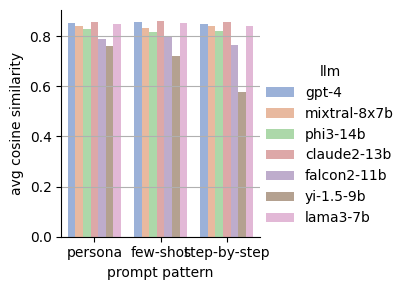

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(
    data=df_recommendataion, kind="bar",
    x="prompt pattern", y="avg cosine similarity", hue="llm",
    palette="muted", alpha=.6, height=3, order=['persona','few-shot','step-by-step'], hue_order=hue_order
)
plt.grid(axis = "y")
plt.savefig('recommendataion_plot.pdf', bbox_inches='tight')
plt.show()

In [9]:
df_recommendataion['bpm_task'] = 'recommendation'
df_recommendataion.rename(columns = {'avg cosine similarity':'metric'}, inplace = True)
df_recommendataion 

,llm,prompt pattern,metric,bpm_task
0,phi3-14b,few-shot,0.816730,recommendation
1,phi3-14b,persona,0.827337,recommendation
2,phi3-14b,step-by-step,0.819192,recommendation
3,claude2-13b,few-shot,0.861436,recommendation
4,claude2-13b,persona,0.857411,recommendation
5,claude2-13b,step-by-step,0.858518,recommendation
6,falcon2-11b,few-shot,0.797591,recommendation
7,falcon2-11b,persona,0.788178,recommendation
8,falcon2-11b,step-by-step,0.764024,recommendation
9,gpt-4,few-shot,0.854782,recommendation


In [10]:
df_rpa = generate_rpa_metrics(df)
df_rpa.rename(columns = column_names_to_replace, inplace = True)
df_rpa.replace(values_to_replace, inplace = True)
df_rpa

c:\Users\kiran.busch\anaconda3\envs\openLLMinBPM-benchmark\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kiran.busch\anaconda3\envs\openLLMinBPM-benchmark\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kiran.busch\anaconda3\envs\openLLMinBPM-benchmark\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,llm,prompt pattern,failure_rate,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1,precision_2,recall_2,f1_2,precision,recall,F1
0,phi3-14b,few-shot,0.075472,0.645833,0.488189,0.556054,0.804795,0.836299,0.820244,0.250000,0.0625,0.100000,0.736246,0.702830,0.713933
1,phi3-14b,persona,0.000000,0.581560,0.645669,0.611940,0.799257,0.765125,0.781818,0.142857,0.1250,0.133333,0.709281,0.705189,0.706464
2,phi3-14b,step-by-step,0.000000,0.682243,0.574803,0.623932,0.789809,0.882562,0.833613,0.333333,0.0625,0.105263,0.740364,0.759434,0.743323
3,claude2-13b,few-shot,0.000000,0.461538,0.236220,0.312500,0.388889,0.024911,0.046823,0.035191,0.7500,0.067227,0.397302,0.115566,0.127171
4,claude2-13b,persona,0.000000,0.000000,0.000000,0.000000,0.663484,0.989324,0.794286,0.000000,0.0000,0.000000,0.439715,0.655660,0.526402
5,claude2-13b,step-by-step,0.000000,0.571429,0.031496,0.059701,0.693467,0.491103,0.575000,0.036697,0.5000,0.068376,0.632129,0.353774,0.401536
6,falcon2-11b,few-shot,0.011792,0.300716,0.992126,0.461538,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.090073,0.297170,0.138244
7,falcon2-11b,persona,0.025943,0.296117,0.960630,0.452690,1.000000,0.003559,0.007092,0.000000,0.0000,0.000000,0.751431,0.290094,0.140294
8,falcon2-11b,step-by-step,0.004717,0.293939,0.763780,0.424508,0.619565,0.202847,0.305630,0.000000,0.0000,0.000000,0.498651,0.363208,0.329704
9,gpt-4,few-shot,0.007075,0.528037,0.889764,0.662757,0.885870,0.580071,0.701075,0.173913,0.2500,0.205128,0.751822,0.660377,0.670883


In [11]:
a = df_rpa[df_rpa['prompt pattern']=='few-shot'].drop(['prompt pattern','failure_rate'],axis=1).round(3)
print(a.to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
 & llm & precision_0 & recall_0 & f1_0 & precision_1 & recall_1 & f1_1 & precision_2 & recall_2 & f1_2 & precision & recall & F1 \\
\midrule
0 & phi3-14b & 0.646000 & 0.488000 & 0.556000 & 0.805000 & 0.836000 & 0.820000 & 0.250000 & 0.062000 & 0.100000 & 0.736000 & 0.703000 & 0.714000 \\
3 & claude2-13b & 0.462000 & 0.236000 & 0.312000 & 0.389000 & 0.025000 & 0.047000 & 0.035000 & 0.750000 & 0.067000 & 0.397000 & 0.116000 & 0.127000 \\
6 & falcon2-11b & 0.301000 & 0.992000 & 0.462000 & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 0.090000 & 0.297000 & 0.138000 \\
9 & gpt-4 & 0.528000 & 0.890000 & 0.663000 & 0.886000 & 0.580000 & 0.701000 & 0.174000 & 0.250000 & 0.205000 & 0.752000 & 0.660000 & 0.671000 \\
12 & lama3-7b & 0.574000 & 0.425000 & 0.489000 & 0.741000 & 0.722000 & 0.732000 & 0.089000 & 0.312000 & 0.139000 & 0.666000 & 0.618000 & 0.636000 \\
15 & mixtral-8x7b & 0.480000 & 0.661000 & 0.556000 & 0.786000 & 0.665000 &

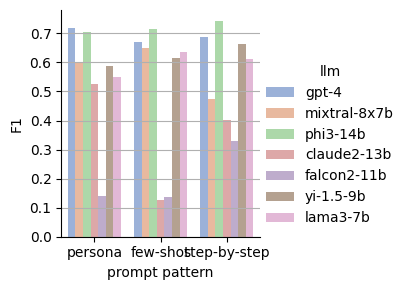

In [12]:
g = sns.catplot(
    data=df_rpa, kind="bar",
    x="prompt pattern", y="F1", hue="llm",
    palette="muted", alpha=.6, height=3, order=['persona','few-shot','step-by-step'], hue_order=hue_order
)
plt.grid(axis = "y")
plt.show()

In [13]:
df_rpa['bpm_task'] = 'rpa'
df_rpa.rename(columns = {'F1':'metric'}, inplace = True)
df_rpa=df_rpa[['llm', 'prompt pattern', 'bpm_task', 'metric']]
df_rpa 

,llm,prompt pattern,bpm_task,metric
0,phi3-14b,few-shot,rpa,0.713933
1,phi3-14b,persona,rpa,0.706464
2,phi3-14b,step-by-step,rpa,0.743323
3,claude2-13b,few-shot,rpa,0.127171
4,claude2-13b,persona,rpa,0.526402
5,claude2-13b,step-by-step,rpa,0.401536
6,falcon2-11b,few-shot,rpa,0.138244
7,falcon2-11b,persona,rpa,0.140294
8,falcon2-11b,step-by-step,rpa,0.329704
9,gpt-4,few-shot,rpa,0.670883


In [14]:
df_constraints = generate_constraints_metrics(df)
df_constraints.rename(columns = column_names_to_replace, inplace = True)
df_constraints.replace(values_to_replace, inplace = True)
df_constraints

,llm,prompt pattern,precedence_precision,precedence_recall,precedence_f1,response_precision,response_recall,response_f1,succession_precision,succession_recall,succession_f1,init_precision,init_recall,init_f1,end_precision,end_recall,end_f1,precision,recall,F1
0,phi3-14b,few-shot,0.136364,0.3,0.187500,0.120690,0.777778,0.208955,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.096154,0.476190,0.160000
1,phi3-14b,persona,0.214286,0.3,0.250000,0.038462,0.222222,0.065574,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.050000,0.238095,0.082645
2,phi3-14b,step-by-step,0.214286,0.3,0.250000,0.106061,0.777778,0.186667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.099010,0.476190,0.163934
3,claude2-13b,few-shot,0.116279,0.5,0.188679,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,1.0,0.363636,0.067961,0.333333,0.112903
4,claude2-13b,persona,0.101124,0.9,0.181818,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.571429,0.105769,0.523810,0.176000
5,claude2-13b,step-by-step,0.200000,0.3,0.240000,0.077922,0.666667,0.139535,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.5,0.285714,0.099010,0.476190,0.163934
6,falcon2-11b,few-shot,0.093750,0.6,0.162162,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.090909,0.285714,0.137931
7,falcon2-11b,persona,0.128205,0.5,0.204082,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.128205,0.238095,0.166667
8,falcon2-11b,step-by-step,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,gpt-4,few-shot,0.111111,0.3,0.162162,0.208333,0.555556,0.303030,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.500000,0.135135,0.476190,0.210526


In [15]:
print(df_constraints[df_constraints['prompt pattern']=='few-shot'].round(3)[['llm','precision','recall','F1']].to_latex())

\begin{tabular}{llrrr}
\toprule
 & llm & precision & recall & F1 \\
\midrule
0 & phi3-14b & 0.096000 & 0.476000 & 0.160000 \\
3 & claude2-13b & 0.068000 & 0.333000 & 0.113000 \\
6 & falcon2-11b & 0.091000 & 0.286000 & 0.138000 \\
9 & gpt-4 & 0.135000 & 0.476000 & 0.211000 \\
12 & lama3-7b & 0.375000 & 0.143000 & 0.207000 \\
15 & mixtral-8x7b & 0.090000 & 0.333000 & 0.141000 \\
18 & yi-1.5-9b & 0.126000 & 0.619000 & 0.210000 \\
\bottomrule
\end{tabular}



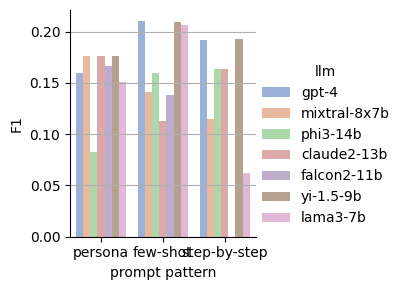

In [16]:
g = sns.catplot(
    data=df_constraints, kind="bar",
    x="prompt pattern", y="F1", hue="llm",
    palette="muted", alpha=.6, height=3, order=['persona','few-shot','step-by-step'], hue_order=hue_order
)
plt.grid(axis = "y")
plt.show()

In [17]:
df_constraints['bpm_task'] = 'constraints'
df_constraints.rename(columns = {'F1':'metric'}, inplace = True)
df_constraints=df_constraints[['llm', 'prompt pattern', 'bpm_task', 'metric']]
df_constraints 

,llm,prompt pattern,bpm_task,metric
0,phi3-14b,few-shot,constraints,0.160000
1,phi3-14b,persona,constraints,0.082645
2,phi3-14b,step-by-step,constraints,0.163934
3,claude2-13b,few-shot,constraints,0.112903
4,claude2-13b,persona,constraints,0.176000
5,claude2-13b,step-by-step,constraints,0.163934
6,falcon2-11b,few-shot,constraints,0.137931
7,falcon2-11b,persona,constraints,0.166667
8,falcon2-11b,step-by-step,constraints,0.000000
9,gpt-4,few-shot,constraints,0.210526


In [18]:
df_qa = generate_qa_metrics(df)
df_qa.rename(columns = column_names_to_replace, inplace = True)
df_qa.replace(values_to_replace, inplace = True)
df_qa

,bpm_task,llm,prompt pattern,complexity,BLEU,ROUG1,ROUGL
0,process_qa,phi3-14b,few-shot,easy,0.249586,0.596154,0.566396
1,process_qa,phi3-14b,few-shot,medium,0.351843,0.690056,0.667267
2,process_qa,phi3-14b,few-shot,complex,0.128027,0.511474,0.400664
3,process_qa,phi3-14b,few-shot,overall,0.243152,0.599228,0.544776
4,process_qa,phi3-14b,persona,easy,0.325570,0.552526,0.531628
...,...,...,...,...,...,...,...
79,process_qa,yi-1.5-9b,persona,overall,0.082028,0.301237,0.260750
80,process_qa,yi-1.5-9b,step-by-step,easy,0.335678,0.561960,0.538170
81,process_qa,yi-1.5-9b,step-by-step,medium,0.224197,0.527935,0.488981
82,process_qa,yi-1.5-9b,step-by-step,complex,0.131411,0.463222,0.372343


In [19]:
b = df_qa[df_qa['prompt pattern']=='few-shot'][['llm','complexity','ROUGL']].round(3)
b

,llm,complexity,ROUGL
0,phi3-14b,easy,0.566
1,phi3-14b,medium,0.667
2,phi3-14b,complex,0.401
3,phi3-14b,overall,0.545
12,claude2-13b,easy,0.516
13,claude2-13b,medium,0.519
14,claude2-13b,complex,0.285
15,claude2-13b,overall,0.440
24,falcon2-11b,easy,0.201
25,falcon2-11b,medium,0.163


In [20]:
print(b.pivot(index="llm", columns="complexity").to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{4}{r}{ROUGL} \\
complexity & complex & easy & medium & overall \\
llm &  &  &  &  \\
\midrule
claude2-13b & 0.285000 & 0.516000 & 0.519000 & 0.440000 \\
falcon2-11b & 0.181000 & 0.201000 & 0.163000 & 0.181000 \\
gpt-4 & 0.452000 & 0.604000 & 0.680000 & 0.579000 \\
lama3-7b & 0.413000 & 0.611000 & 0.721000 & 0.582000 \\
mixtral-8x7b & 0.420000 & 0.657000 & 0.723000 & 0.600000 \\
phi3-14b & 0.401000 & 0.566000 & 0.667000 & 0.545000 \\
yi-1.5-9b & 0.387000 & 0.610000 & 0.617000 & 0.538000 \\
\bottomrule
\end{tabular}



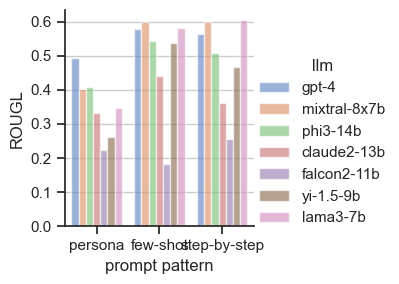

In [21]:
df_qa = df_qa[df_qa['complexity']=='overall']
sns.set(style="ticks")
g = sns.catplot(
    data=df_qa, kind="bar",
    x="prompt pattern", y="ROUGL", hue="llm",
    palette="muted", alpha=.6, height=3, order=['persona','few-shot','step-by-step'], hue_order=hue_order
)
plt.grid(axis = "y")
plt.show()

In [22]:
df_qa

,bpm_task,llm,prompt pattern,complexity,BLEU,ROUG1,ROUGL
3,process_qa,phi3-14b,few-shot,overall,0.243152,0.599228,0.544776
7,process_qa,phi3-14b,persona,overall,0.192764,0.457995,0.409243
11,process_qa,phi3-14b,step-by-step,overall,0.257046,0.565055,0.507573
15,process_qa,claude2-13b,few-shot,overall,0.195472,0.499466,0.439969
19,process_qa,claude2-13b,persona,overall,0.132363,0.377663,0.331573
23,process_qa,claude2-13b,step-by-step,overall,0.160523,0.417296,0.362537
27,process_qa,falcon2-11b,few-shot,overall,0.080229,0.208335,0.181475
31,process_qa,falcon2-11b,persona,overall,0.089355,0.249680,0.222844
35,process_qa,falcon2-11b,step-by-step,overall,0.117833,0.282883,0.255782
39,process_qa,gpt-4,few-shot,overall,0.252772,0.628464,0.578735


In [23]:
df_qa['bpm_task'] = 'qa'
df_qa.rename(columns = {'ROUGL':'metric'}, inplace = True)
df_qa=df_qa[['llm', 'prompt pattern', 'bpm_task', 'metric']]
df_qa

,llm,prompt pattern,bpm_task,metric
3,phi3-14b,few-shot,qa,0.544776
7,phi3-14b,persona,qa,0.409243
11,phi3-14b,step-by-step,qa,0.507573
15,claude2-13b,few-shot,qa,0.439969
19,claude2-13b,persona,qa,0.331573
23,claude2-13b,step-by-step,qa,0.362537
27,falcon2-11b,few-shot,qa,0.181475
31,falcon2-11b,persona,qa,0.222844
35,falcon2-11b,step-by-step,qa,0.255782
39,gpt-4,few-shot,qa,0.578735


In [24]:
df[['model_name', 'inferance_time','completion_tokens']].groupby(['model_name']).mean().reset_index().round(2)

,model_name,inferance_time,completion_tokens
0,Phi-3-14b,0.31,9.39
1,claude2-13b,0.40,10.57
2,falcon2-11b,2.18,49.89
3,gpt-4,1.06,5.14
4,lama3-7b,0.19,6.18
5,mixtral-8x7b-instruct,2.18,7.72
6,yi-15-9b,1.74,32.02


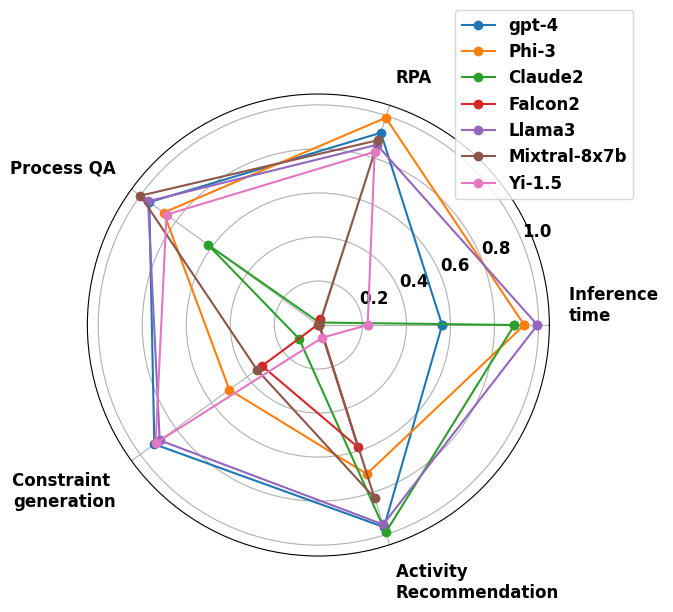

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import matplotlib as mpl

mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams.update({
    'font.size': 12,       # Sets the base font size for everything
    'font.weight': 'bold', # Applies bold style to all text elements
    'axes.labelsize': 12,  # Explicitly set font size for axis labels (if needed)
    #'axes.labelweight': 'bold', # Ensures axis labels are bold
    'xtick.labelsize': 12, # Font size for X-axis tick labels
    #'xtick.labelweight': 'bold', # Ensures X-axis tick labels are bold
    'ytick.labelsize': 12, # Font size for Y-axis tick labels
    #'ytick.labelweight': 'bold', # Ensures Y-axis tick labels are bold
    'legend.fontsize': 12, # Legend font size
    'legend.title_fontsize': 12 # Legend title font size
})
# Example DataFrame setup
data = {
    'Inference \ntime': [-1.06,-0.31, -0.40, -2.18, -0.19, -2.18, -1.74],
    'RPA': [0.670883, 0.713933, 0.127171, 0.138244, 0.636429, 0.650009, 0.616464],
    'Process QA': [0.578735,0.544776, 0.439969, 0.181475, 0.581596, 0.599799, 0.538131],
    'Constraint \ngeneration': [0.210526,0.160000, 0.112903, 0.137931, 0.206897, 0.141414, 0.209677],
    'Activity \nRecommendation': [0.854782,0.816730, 0.858518, 0.797591, 0.852911, 0.833878, 0.719010],
}
models = ['gpt-4','Phi-3', 'Claude2', 'Falcon2', 'Llama3', 'Mixtral-8x7b', 'Yi-1.5']
df = pd.DataFrame(data, index=models)


# Define min and max values for each category for normalization
ranges = [(-2.19,-0.18), (0.12, 0.72), (0.18, 0.6), (0.1, 0.22), (0.71, 0.86)]   # Min and max for each category

# Normalize data within the DataFrame
for col, (min_val, max_val) in zip(df.columns, ranges):
    df[col] = (df[col] - min_val) / (max_val - min_val)

# Prepare data for radar chart
labels = df.columns.tolist()
num_vars = len(labels)

# Calculate angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each language model
for i, row in df.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop for continuity
    ax.plot(angles, values, marker='o', label=i)  # Only plot the line and markers

# Set labels and grid
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Adjust label alignment based on their position around the circle
for label, angle_rad in zip(ax.get_xticklabels(), angles[:-1]):
    if angle_rad <= pi/2:
        ha, va = 'left', 'bottom'
    elif pi/2 < angle_rad <= pi:
        ha, va = 'right', 'bottom'
    elif pi < angle_rad <= 3 * pi/2:
        ha, va = 'right', 'top'
    else:
        ha, va = 'left', 'top'

    label.set_horizontalalignment(ha)
    label.set_verticalalignment(va)

ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Set the radial grid lines
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

# Display the radar chart
plt.savefig('radar_plot.pdf', bbox_inches='tight')
plt.show()

In [34]:
print(df.round(2).to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & Inference 
time & RPA & Process QA & Constraint 
generation & Activity 
Recommendation \\
\midrule
gpt-4 & 0.560000 & 0.920000 & 0.950000 & 0.920000 & 0.970000 \\
Phi-3 & 0.940000 & 0.990000 & 0.870000 & 0.500000 & 0.710000 \\
Claude2 & 0.890000 & 0.010000 & 0.620000 & 0.110000 & 0.990000 \\
Falcon2 & 0.000000 & 0.030000 & 0.000000 & 0.320000 & 0.580000 \\
Llama3 & 1.000000 & 0.860000 & 0.960000 & 0.890000 & 0.950000 \\
Mixtral-8x7b & 0.000000 & 0.880000 & 1.000000 & 0.350000 & 0.830000 \\
Yi-1.5 & 0.220000 & 0.830000 & 0.850000 & 0.910000 & 0.060000 \\
\bottomrule
\end{tabular}



In [35]:
df

,Inference \ntime,RPA,Process QA,Constraint \ngeneration,Activity \nRecommendation
gpt-4,0.562189,0.918138,0.949369,0.921050,0.965213
Phi-3,0.935323,0.989888,0.868514,0.500000,0.711533
Claude2,0.890547,0.011952,0.618974,0.107525,0.990120
Falcon2,0.004975,0.030407,0.003512,0.316092,0.583940
Llama3,0.995025,0.860715,0.956181,0.890808,0.952740
Mixtral-8x7b,0.004975,0.883348,0.999521,0.345117,0.825853
Yi-1.5,0.223881,0.827440,0.852693,0.913975,0.060067


In [36]:
labels

['Inference \ntime',
 'RPA',
 'Process QA',
 'Constraint \ngeneration',
 'Activity \nRecommendation']

In [37]:
num_vars

5

In [25]:
frames = [df_recommendataion, df_rpa, df_constraints, df_qa]
df_prompts = pd.concat(frames).reset_index(drop='index')
df_prompts

,llm,prompt pattern,metric,bpm_task
0,phi3-14b,few-shot,0.816730,recommendation
1,phi3-14b,persona,0.827337,recommendation
2,phi3-14b,step-by-step,0.819192,recommendation
3,claude2-13b,few-shot,0.861436,recommendation
4,claude2-13b,persona,0.857411,recommendation
...,...,...,...,...
79,mixtral-8x7b,persona,0.401498,qa
80,mixtral-8x7b,step-by-step,0.597708,qa
81,yi-1.5-9b,few-shot,0.538131,qa
82,yi-1.5-9b,persona,0.260750,qa


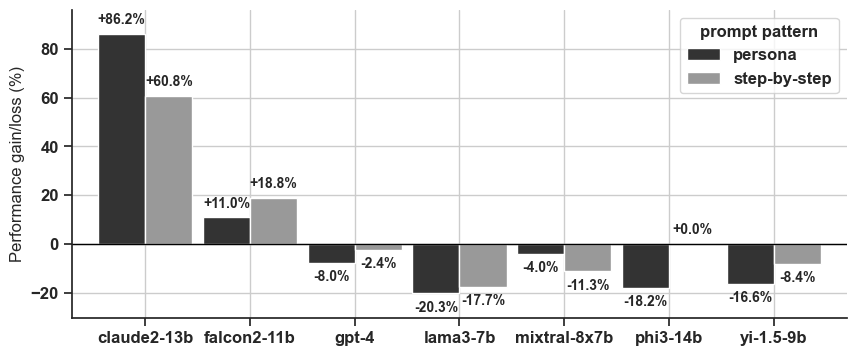

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set bold font for all text in the plot
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams.update({
    'font.size': 10,       # Sets the base font size for everything
    'font.weight': 'bold', # Applies bold style to all text elements
    'axes.labelsize': 12,  # Explicitly set font size for axis labels (if needed)
    #'axes.labelweight': 'bold', # Ensures axis labels are bold
    'xtick.labelsize': 12, # Font size for X-axis tick labels
    #'xtick.labelweight': 'bold', # Ensures X-axis tick labels are bold
    'ytick.labelsize': 12, # Font size for Y-axis tick labels
    #'ytick.labelweight': 'bold', # Ensures Y-axis tick labels are bold
    'legend.fontsize': 12, # Legend font size
    'legend.title_fontsize': 12 # Legend title font size
})
# Create DataFrame
df = df_prompts

# Pivot the data to have prompt patterns as columns
pivot_df = df.pivot_table(index=['llm', 'bpm_task'], columns='prompt pattern', values='metric')

# Calculate the performance change relative to 'few-shot' as percentage
pivot_df['persona'] = ((pivot_df['persona'] - pivot_df['few-shot']) / pivot_df['few-shot']) * 100
pivot_df['step-by-step'] = ((pivot_df['step-by-step'] - pivot_df['few-shot']) / pivot_df['few-shot']) * 100

# Reset index to make llm and bpm_task columns again
pivot_df.reset_index(inplace=True)

# Calculate average performance gain/loss for each llm in percentage
average_performance_pct = pivot_df.groupby('llm')[['persona', 'step-by-step']].mean()

# Plotting
colors = ['0.2', '0.6'] 
#ax = average_performance_pct.plot(kind='bar',color=colors, figsize=(10, 6))
ax = average_performance_pct.plot(kind='bar', color=colors, figsize=(10, 4), width=.9)  # Increase width as desired

#plt.ylabel('Performance gain/loss (%)')
ax.set_ylabel('Performance gain/loss (%)')
plt.xlabel(None)
plt.xticks(rotation=0)
#plt.grid(True)

# Adjusting y-axis limit dynamically based on the data
ax.set_ylim([min(average_performance_pct.min().min(), 0) - 10, max(average_performance_pct.max().max(), 0) + 10])

# Adding text labels on the bars with signs
for p in ax.patches:
    value = p.get_height()
    sign = '+' if value > 0 else ''
    y_offset = 10 if value > 0 else -10
    y_coord = max(value, 0) if value > 0 else min(value, 0)
    ax.annotate(f'{sign}{value:.1f}%', (p.get_x() + p.get_width() / 2., y_coord),
                ha='center', va='center', xytext=(0, y_offset), textcoords='offset points')

# Despine top and right
ax.hlines(y=0., xmin=-5, xmax=20, linewidth=1, color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.legend(loc='upper left',ncols=1) # bbox_to_anchor=(1.2, 1.2)
plt.grid()
plt.savefig('prompt_templates_plot_new.pdf', bbox_inches='tight')
plt.show()


In [29]:
print(average_performance_pct.to_latex())

\begin{tabular}{lrr}
\toprule
prompt pattern & few shot & step-by-step \\
llm &  &  \\
\midrule
claude2-13b & -19.632810 & -5.277132 \\
falcon2-11b & -9.018050 & 11.681464 \\
gpt-4 & 10.618781 & 7.388823 \\
lama3-7b & 30.193601 & 6.547195 \\
mixtral-8x7b & 9.494934 & -1.515691 \\
phi3-14b & 31.623246 & 31.655199 \\
yi-1.5-9b & 31.189619 & 19.291267 \\
\bottomrule
\end{tabular}

